In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/TMKOC_Episode.csv'
tmkoc_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(tmkoc_df.head())

# Display basic information about the dataset
print(tmkoc_df.info())

# Display summary statistics
print(tmkoc_df.describe(include='all'))


   Unnamed: 0  episode_number  \
0           0               1   
1           1               2   
2           2               3   
3           3               4   
4           4               5   

                                       Episode_title  \
0  Taarak Mehta Introduces Himself And Society Me...   
1   Jethalal's Son Tapu Decides To Spend His Holiday   
2                Tapu Has Been The Worry Of Jethalal   
3              Daya Approaches Taarak Mehta For Help   
4                           Jethalal In Huge Trouble   

                                         description Episode_runtime  \
0  Taarak Mehta introduces himself and the societ...         21 mins   
1  Jethalal's son Tapu decides to spend his holid...         18 mins   
2  More than the society members, Tapu has been t...         19 mins   
3  Tapu lands Jethalal Gada into yet another trou...         18 mins   
4  Tapu has decided to take full revenge from his...         18 mins   

   Released_on  
0  28 Jul 2008

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Missing values in each column:
Unnamed: 0          0
episode_number      0
Episode_title       0
description         0
Episode_runtime     0
Released_on        11
dtype: int64


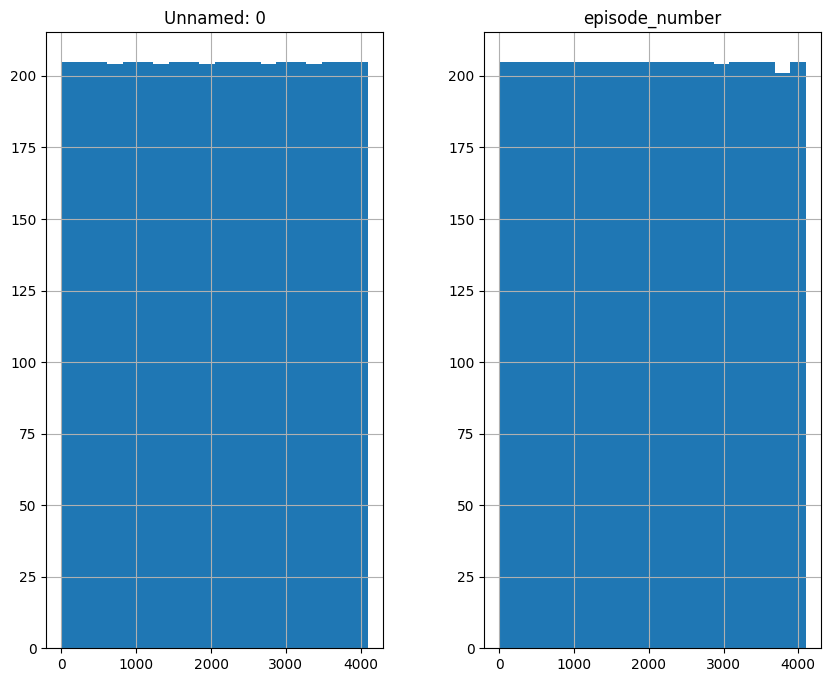

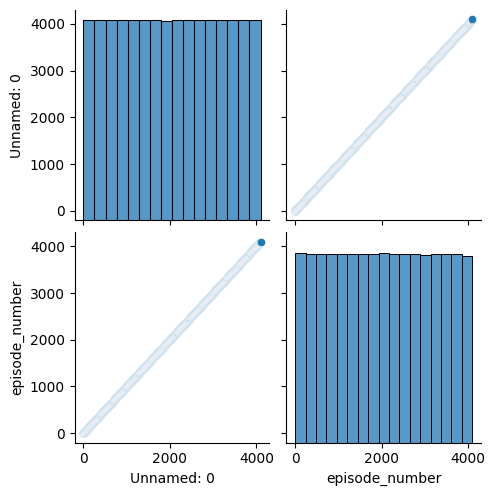

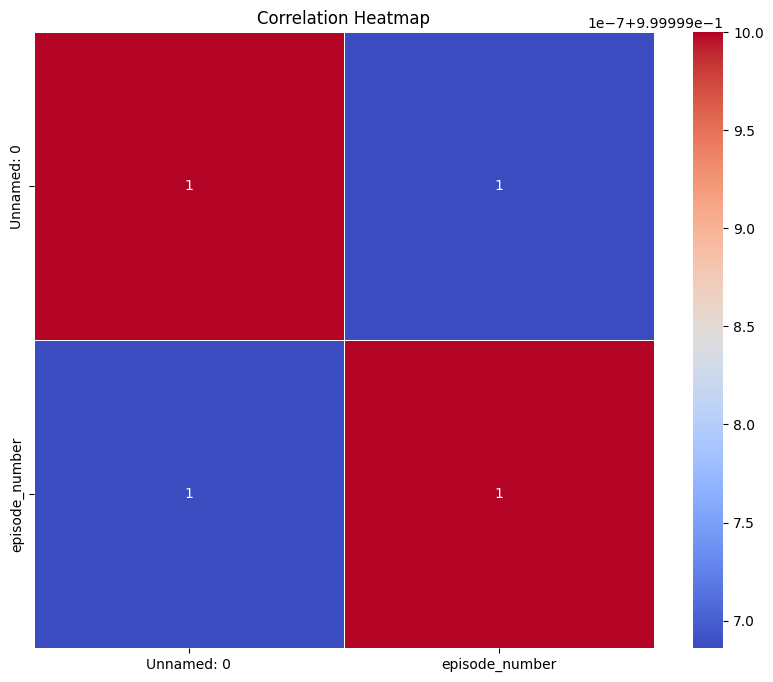

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("\nMissing values in each column:")
print(tmkoc_df.isnull().sum())

# Select numerical columns for correlation
numerical_columns = tmkoc_df.select_dtypes(include=['number'])

# Visualize the distribution of numerical features
numerical_columns.hist(figsize=(10, 8), bins=20)
plt.show()

# Visualize relationships between numerical variables
sns.pairplot(numerical_columns)
plt.show()

# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check for the correct column name
print(tmkoc_df.columns)  # Print the available columns

# Handling missing values by filling with median for numerical and mode for categorical
tmkoc_df.fillna(tmkoc_df.median(numeric_only=True), inplace=True)
tmkoc_df.fillna(tmkoc_df.mode().iloc[0], inplace=True)

# Encoding categorical variables if any exist
for col in tmkoc_df.select_dtypes(include=['object']).columns:
    tmkoc_df[col] = LabelEncoder().fit_transform(tmkoc_df[col])

# Normalizing numerical features
scaler = StandardScaler()
numerical_columns = tmkoc_df.select_dtypes(include=['float64', 'int64']).columns
tmkoc_df[numerical_columns] = scaler.fit_transform(tmkoc_df[numerical_columns])

# Splitting the data into training and test sets
# Replace 'Views' with the actual target column name
X = tmkoc_df.drop('Episode_runtime', axis=1)
y = tmkoc_df['Episode_runtime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Index(['Unnamed: 0', 'episode_number', 'Episode_title', 'description',
       'Episode_runtime', 'Released_on'],
      dtype='object')


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Building a Random Forest Regressor model (for continuous target)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model (using metrics suitable for regression)
print("\nModel Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))



Model Evaluation:
Mean Squared Error: 0.540257511617998
R-squared: 0.5868899333206699


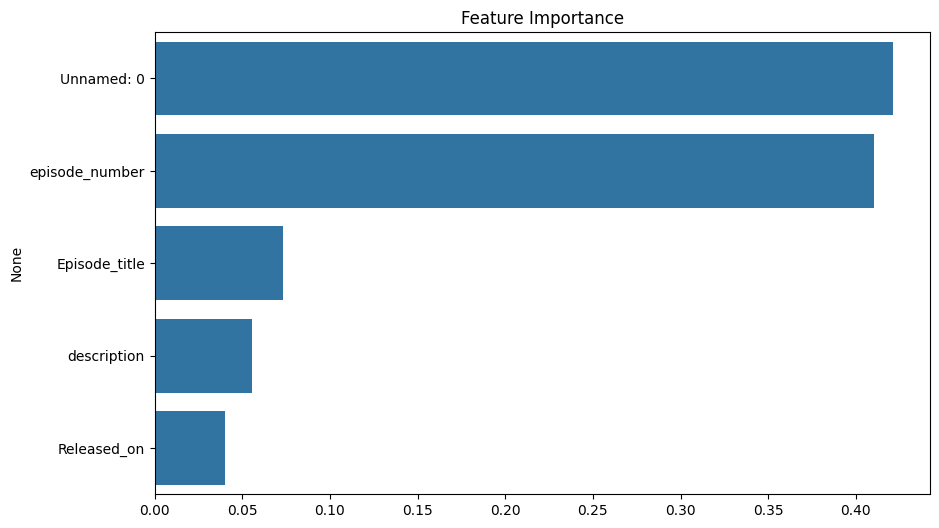

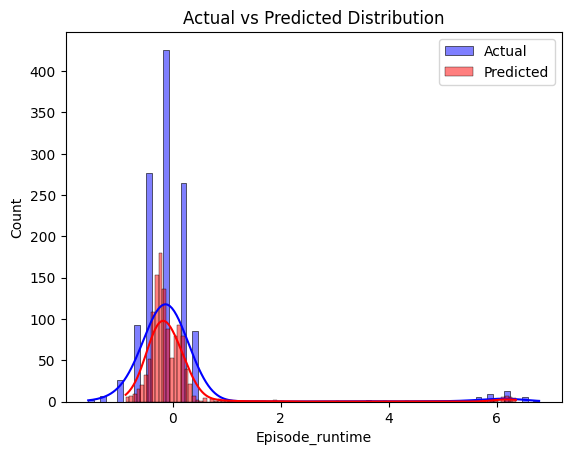

In [11]:
# Feature importance visualization
importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.show()

# Visualizing predictions
sns.histplot(y_test, color="blue", label="Actual", kde=True)
sns.histplot(y_pred, color="red", label="Predicted", kde=True)
plt.legend()
plt.title('Actual vs Predicted Distribution')
plt.show()
